<a href="https://colab.research.google.com/github/axel-sirota/ml_and_nlp/blob/main/1-Pre-NLP/3_Text_Processing_Logistic_Regression_and_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression and Boosting Algorithms


<a id="predicting-a-categorical-response"></a>
## Predicting a Single Categorical Response
---



### Installing stuff

In [ ]:
!pip install --upgrade textblob spacy 'gensim==4.2.0' swifter keras_preprocessing

In [ ]:
!python -m textblob.download_corpora lite
!python -m spacy download en_core_web_sm

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

import spacy
import gensim
import warnings
import nltk
warnings.filterwarnings('ignore')
nltk.download('punkt')
textblob_tokenizer = lambda x: TextBlob(x).words


In [ ]:
%%writefile get_data.sh
if [ ! -f yelp.csv ]; then
  wget -O yelp.csv https://www.dropbox.com/s/xds4lua69b7okw8/yelp.csv?dl=0
fi

In [ ]:
!bash get_data.sh

In [ ]:
# Read yelp.csv into a DataFrame.
path = './yelp.csv'
yelp = pd.read_csv(path)
# Create a new DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[ (yelp.stars == 1) | (yelp.stars == 5) ]

# Define X and y.
X = yelp_best_worst.text
y = yelp_best_worst.stars

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<a id="using-logistic-regression-for-classification"></a>
## Using Logistic Regression for Classification
---



In [ ]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X,y)


Of course this simply fails, we need to preprocess the text, convert it into a Tensor format and then and only then we can use models!

### Converting text to vectors

In [ ]:
import re
nltk.download('stopwords')
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'


def preprocess_text(text, should_join=True):
    text = ' '.join(word.lower() for word in textblob_tokenizer(text))
    text = re.sub(r'http\S+', '', text) # remove http links
    text = re.sub(r'bit.ly/\S+', '', text) # rempve bitly links
    text = text.strip('[link]') # remove [links]
    text = re.sub('['+my_punctuation + ']+', ' ', text) # remove punctuation
    text = re.sub('\s+', ' ', text) #remove double spacing
    text = re.sub(r"[^a-zA-Z.,&!?]+", r" ", text) # only normal characters
    text_token_list = [word for word in text.split(' ')
                            if word not in my_stopwords] # remove stopwords
    text_token_list = [word_rooter(word) if '#' not in word else word
                        for word in text_token_list] # apply word rooter
    text = ' '.join(text_token_list)
    if should_join:
      return ' '.join(gensim.utils.simple_preprocess(text))
    else:
      return gensim.utils.simple_preprocess(text)

In [ ]:
import swifter
X_preprocessed = X.swifter.apply(preprocess_text)

In [ ]:
X_preprocessed[0]

How do we pass from text to numbers? With tokenizers. We will use Tensorflow ones!

In [ ]:
# Find a set named vocab that has all unique words


In [ ]:
print(f'{len(vocab)} unique words')

In [ ]:
def get_maximum_review_length(srs):
    pass
    return maximum


maximum = get_maximum_review_length(X_preprocessed)

In [ ]:
print(f'The maximum review was {maximum} words long')

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
ids_from_words = preprocessing.StringLookup(vocabulary=list(vocab), mask_token=None)

In [ ]:
words_from_ids = preprocessing.StringLookup(
    vocabulary=ids_from_words.get_vocabulary(), invert=True, mask_token=None)

In [ ]:
import tensorflow as tf
def text_from_ids(ids):
  return tf.strings.reduce_join(words_from_ids(ids), axis=-1, separator=' ')

In [ ]:
ids = ids_from_words(preprocess_text('Only you can prevent forest fires', should_join=False))
ids

In [ ]:
preprocess_text('Only you can prevent forest fires', should_join=False)

In [ ]:
text_from_ids(ids)


In [ ]:
def pad_sequence_of_tokens(x, maxlen, unk_token='[UNK]'):
  if len(x)<maxlen:
    x.extend([unk_token]*(maxlen-len(x)))
  return x

In [ ]:
from keras_preprocessing.sequence import pad_sequences
# Very useful method to keep in mind
def get_ids_tensor(srs):

  processed = srs.swifter.apply(lambda x: pad_sequence_of_tokens(preprocess_text(x, should_join=False), maxlen=maximum)).to_list()
  return tf.squeeze(tf.constant(pad_sequences(ids_from_words(processed), maxlen=maximum, padding='post'), dtype='int32'))



In [ ]:
all_ids = get_ids_tensor(srs=X_preprocessed.reset_index(drop=True))
all_ids

In [ ]:
all_ids.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_ids.numpy(), y, test_size=0.25 ,random_state=99)

### Using Logistic Regression

In [ ]:

# Train a Logistic Regression on X_train and give the accuracy
logreg = None


In [ ]:
from sklearn import metrics
y_pred = logreg.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred)))

<a id="probability-odds-e-log-and-log-odds"></a>
### Probability, e, Log, and Log Odds
---

To understand how logistic regression predicts the probability of class membership we need to start by understanding the relationship between probability, odds ratios, and log odds ratios. This is because logistic regression predicts log odds and so reading log odds is extremely useful for interpreting logistic regression.

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

It is often useful to think of the numeric odds as a ratio. For example, 5/1 = 5 odds is "5 to 1" -- five wins for every one loss (e.g. of six total plays). 2/3 odds means "2 to 3" -- two wins for every three losses (e.g. of five total plays).

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

----

<a id="understanding-e-and-the-natural-logarithm"></a>
### Understanding e and the Natural Logarithm

What is e? It is the base rate of growth shared by all continually growing processes:

e is the irrational base of the natural log `ln`.

- 2.718281828459

In [ ]:
# Exponential function: e^1
e = np.exp(1)
e

What is a (natural) log? It gives you the time needed to reach a certain level of growth:

In [ ]:
# Time needed to grow 1 unit to 2.718 units
# ln e = 1
np.log(2.718281828459) # very close to previous value

In [ ]:
np.log(e)

It is also the inverse of the exponential function:

In [ ]:
# e^5
np.exp(5)

In [ ]:
# np.exp(5)
2.7182818**5

In [ ]:
# Taking the log of the exponential returns back to original input
np.log(np.exp(5))

Lets take one of our odds from out table and walk through how it works.

In [ ]:
# Odds = 0.25
# ln 0.25 = -1.38629436
np.log(0.25)

In [ ]:
print(e**-1.3862943611198906)
print(np.exp(-1.3862943611198906))

<img src="https://www.dropbox.com/scl/fi/3s5btre5ofls0efzbmj93/log_vs_ols.jpg?rlkey=bc6wf7ejoygrdbk1bqqsn6851&raw=1"  align="Center"/>

<a id="what-is-logistic-regression"></a>
## What Is Logistic Regression?
---

Linear regression: Continuous response is modeled as a linear combination of the features.

$$y = \beta_0 + \beta_1x$$

Logistic regression: Log odds of a categorical response being "true" (1) is modeled as a linear combination of the features.

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the logit function.

Probability is sometimes written as pi.

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?

- The most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): Decompose the problem into multiple binary classification problems.
- Multinomial logistic regression, on the other hand, can solve this as a single problem, but how this works is beyond the scope of this lesson.

<a id="comparing-logistic-regression-to-other-models"></a>
## Comparing Logistic Regression to Other Models
---

Advantages of logistic regression:

- Highly interpretable (if you remember how).
- Model training and prediction are fast.
- No tuning is required (excluding regularization).
- Features don't need scaling.
- Can perform well with a small number of observations.
- Outputs well-calibrated predicted probabilities.

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log odds of the response.
- Performance is (generally) not competitive with the best supervised learning methods.
- Can't automatically learn feature interactions.

----

## Is accuracy is good metric?
<img src="https://www.dropbox.com/scl/fi/ppmtzavh3ot6jinkb35vd/accuracy.png?rlkey=32gfvubdwn1p4i9anwut7ug39&raw=1"  align="center"/>

### The Accuracy Paradox

Accuracy is a very intuitive metric — it's a lot like an exam score where you get total correct/total attempted. However, accuracy is often a poor metric in application. There are many reasons for this:
- Imbalanced problems problems with 95% positives in the baseline will have 95% accuracy even with no predictive power.
  - This is the paradox; pursuing accuracy often means predicting the most common class rather than doing the most useful work.
- Applications often have uneven penalties and rewards for true positives and false positives.
- Ranking predictions in the correct order be more important than getting them correct.
- In many case we need to know the exact probability of a positives and negatives.
  - To calculate an expected return.
  - To triage observations that are borderline positive.

<a id="advanced-classification-metrics"></a>
## Advanced Classification Metrics

---

When we evaluate the performance of a logistic regression (or any classifier model), the standard metric to use is accuracy: How many class labels did we guess correctly? However, accuracy is only one of several metrics we could use when evaluating a classification model.

$$Accuracy = \frac{total~predicted~correct}{total~predicted}$$

Accuracy alone doesn’t always give us a full picture.

If we know a model is 75% accurate, it doesn’t provide any insight into why the 25% was wrong.

Consider a binary classification problem where we have 165 observations/rows of people who are either smokers or nonsmokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

There are 60 in class 0, nonsmokers, and 105 observations in class 1, smokers
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

We have 55 predictions of class, predicted as nonsmokers, and 110 of class 1, predicted to be smokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

- **True positives (TP):** These are cases in which we predicted yes (smokers), and they actually are smokers.
- **True negatives (TN):** We predicted no, and they are nonsmokers.
- **False positives (FP):** We predicted yes, but they were not actually smokers. (This is also known as a "Type I error.")
- **False negatives (FN):** We predicted no, but they are smokers. (This is also known as a "Type II error.")
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Categorize these as TP, TN, FP, or FN:**

Try not to look at the answers above.
    
- We predict nonsmoker, but the person is a smoker.
- We predict nonsmoker, and the person is a nonsmoker.
- We predict smoker and the person is a smoker.
- We predict smoker and the person is a nonsmoker.

<!--ANSWER
- FN
- TN
- TP
- FP
-->

<a id="accuracy-true-positive-rate-and-false-negative-rate"></a>
### Accuracy, True Positive Rate, and False Negative Rate

**Accuracy:** Overall, how often is the classifier correct?

<span>
    (<span style="color: green">TP</span>+<span style="color: red">TN</span>)/<span style="color: blue">total</span> = (<span style="color: green">100</span>+<span style="color: red">50</span>)/<span style="color: blue">165</span> = 0.91
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom; color: blue">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center; background-color: red">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center; background-color: green">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**True positive rate (TPR)** asks, “Out of all of the target class labels, how many were accurately predicted to belong to that class?”

For example, given a medical exam that tests for cancer, how often does it correctly identify patients with cancer?

<span>
<span style="color: green">TP</span>/<span style="color: blue">actual yes</span> = <span style="color: green">100</span>/<span style="color: blue">105</span> = 0.95
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center;background-color: green">TP = 100</td>
    <td style="text-align: center;color: blue">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**False positive rate (FPR)** asks, “Out of all items not belonging to a class label, how many were predicted as belonging to that target class label?”

For example, given a medical exam that tests for cancer, how often does it trigger a “false alarm” by incorrectly saying a patient has cancer?

<span>
<span style="color: orange">FP</span>/<span style="color: blue">actual no</span> = <span style="color: orange">10</span>/<span style="color: blue">60</span> = 0.17
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center;background-color: orange">FP = 10</td>
    <td style="text-align: center;color:blue">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Can you see that we might weigh TPR AND FPR differently depending on the situation?**

- Give an example when we care about TPR, but not FPR.
- Give an example when we care about FPR, but not TPR.

<!--
ANSWER:
- During an initial medical diagnosis, we want to be sensitive. We want initial screens to come up with a lot of true positives, even if we get a lot of false positives.
- If we are doing spam detection, we want to be precise. Anything that we remove from an inbox must be spam, which may mean accepting fewer true positives.
-->

## The Confusion Matrix
<img src="https://www.dropbox.com/scl/fi/eaig0g63lct0r7dzt6qit/confusion.png?rlkey=edw4kjneymt6q0hl6r48512py&raw=1" align="center"/>

# What is precison and recall?
<img src="https://www.dropbox.com/scl/fi/yf2rcxzstnz6p4ef11xj0/recall.png?rlkey=mmbfwbgvzadrwpgqwi44gxhnk&raw=1" align="center"/>

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

---

## Lesson Review
- **Logistic regression**
  - What kind of machine learning problems does logistic regression address?
  - What do the coefficients in a logistic regression represent? How does the interpretation differ from ordinary least squares? How is it similar?
  
- **The confusion matrix**
  - How do true positive rate and false positive rate help explain accuracy?
  - Why might one classification metric be more important to tune than another? Give an example of a business problem or project where this would be the case.

## Using Boosting Algorithms and other things

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

## Multiclass Classification

Just check in the estimators, most support multiclass classification.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, multi_class='multinomial').fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)

### **Homework**: Try to perform the stars classification with Logistic Regression but without filtering only for 5 and 1 stars.

## Clustering

In this lab, we will use the [Iris](https://scikit-learn.org/stable/datasets/index.html#iris-dataset) open dataset and scikit-learn clustering algorithms to effectively return the species of all those flowers!

The objective of this lab is to understand how clustering can help us identify "potential" labels of our dataset, which we can later on feed to supervised algorithms.

As we know, only 0.1% of real-world data has a label of each item (imagine an image and, next to it, a list of all the animals represented). This is what we call *annotated data*. However, annotation is often:

- Expensive
- Difficult to standardize
- Difficult to scale
- Sensitive to design changes
- Hard to do right



<img src="https://www.dropbox.com/scl/fi/g5lkwhrbsod6xps2b9fus/unlabeled-data-car.jpg?rlkey=rqe4ge1ctchi5z28epalgusdo&raw=1"  align="center"/>




Examples of non-annotated data include:

- Chats
- Audio
- Medical histories

So what can we do in that case? One of the common algorithms to attack this problem is _clustering_.

Clustering is a set of algorithms that find intrinsic associations in our data to end up with something like this:

![Clustering example](https://raw.githubusercontent.com/axel-sirota/getting-started-unsupervised-learning/master/clustering-example.png)

There are two fundamental techniques for this: *hierarchical* and *non-hierarchical* clustering.

### Hierarchical Clustering

In Hierarchical clustering, which is also called agglomerative, we add elements in a nested way. For example:

![Hierarchical clustering example](https://raw.githubusercontent.com/axel-sirota/getting-started-unsupervised-learning/master/hierarchiecal-clustering.png)

To do this, we do the following:

1. Start first cluster with the two elements closest to each other
2. Calculate the distance between this cluster and the other elements
3. Create a new cluster or append to existing one, based on which have the least distance (we append, by treating the new cluster as another element, if it is closest to the element)
4. Continue

Easy right?

Let's do it in Python! First we will import all the necessary packages:

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
np.random.seed(42)

We will now load the dataset, which is trivial in scikit-learn given its dataset loading abilities, and fit the hierarchical clustering model:

In [ ]:
iris = load_iris()
X = iris.data
model = AgglomerativeClustering(n_clusters=3, compute_distances=True)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

It is *THAT* easy! Let's see how well we performed:


In [ ]:
print(f'As expected, the number of clusters predicted by the models are {model.n_clusters_}')

predicted_labels = model.labels_
corrected_predicted_labels = np.where((predicted_labels==0)|(predicted_labels==1), predicted_labels^1, predicted_labels) # Hierarchiecal starts labels with 1 and the dataset with 0
real_labels = iris.target
equal = 0
for predicted_label, real_label in zip(corrected_predicted_labels, real_labels):
    if  predicted_label == real_label:
        equal += 1


print(f'Accuracy of hierarchiecal clustering with clusters specified is {100*equal / len(corrected_predicted_labels)} %')


As expected, the number of clusters predicted by the models are 3
Accuracy of hierarchiecal clustering with clusters specified is 89.33333333333333 %


Not so bad for a split second operation, right?! What this will do is:

1. Get a random flower
2. Calculate the distance of it against all other elements
3. Create a "cluster" of size 2 with the shortest sample
4. Iterate until all elements are in a cluster

What if we wanted to plot this? This would be as easy as:


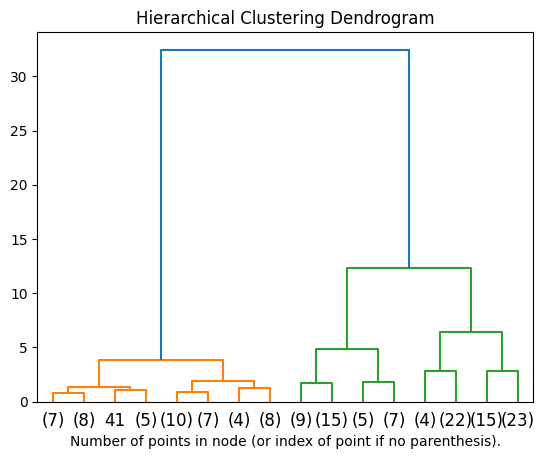

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Of course you may point out that it's easy when you know *ahead of time* that there are three clusters! And you would be right, but this example is just for you to get your feet wet and start learning.

There are multiple ways of optimizing the number of clusters hyperparameter, but that is out of scope for this introduction. If you're curious, I recommend checking out [_Hands-On Unsupervised Learning Using Python_](https://learning.oreilly.com/library/view/hands-on-unsupervised-learning/9781492035633/) by Ankur A. Patel (O'Reilly).

For know, lets move on to non-hierarchical clustering and its most prominent example: _k_-means!

### Non-Hierarchiechal Clustering

_k_-means is the most famous clustering algorithm of all, and for a good reason:

- It is stable
- It scales
- It is reliable
- It is well studied

In a nutshell, the objective of _k_-means is to find inherent clusters using the following recipe:

1. Start with _k_ randomly chosen landmarks for starting our clusters.
1. Assign every element to a cluster based on minimum distance (which can be anything we chose!).
1. Now that there are _k_ clusters, optimize them.
1. Calculate the centers of each cluster. This is done by averaging them out. These are the new landmarks for the next iteration.
1. Continue until there is no reassignment in step 2.

This process is represented by the following:

![_k_-means Example](https://raw.githubusercontent.com/axel-sirota/getting-started-unsupervised-learning/master/kmeans.png )

First to perform _k_-means, we need to perform our imports:

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import datasets
np.random.seed(42)
del predicted_labels
del model
del predicted_label
del corrected_predicted_labels

We will now load the dataset, which is trivial in scikit-learn with its dataset loading abilities, and then fit the _k_-means model:

In [ ]:
iris = load_iris()
X = iris.data
model = KMeans(n_clusters=3, init='random', max_iter=2000, tol=10**-7, random_state=42, n_init='auto')
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Let's compare it for a second with the clustering method we saw before by checking it's accuracy:

In [ ]:
predicted_labels = model.labels_
where_0 = np.where(predicted_labels == 0)
where_1 = np.where(predicted_labels == 1)

predicted_labels[where_0] = 1
predicted_labels[where_1] = 0
real_labels = iris.target
equal = 0
for predicted_label, real_label in zip(predicted_labels, real_labels):
    if  predicted_label == real_label:
        equal += 1


print(f'Accuracy of _k_-means clustering with clusters specified is {100*equal / len(predicted_labels)} %')

Accuracy of _k_-means clustering with clusters specified is 89.33333333333333 %


#### Figuring out the number of clusters

We can see that it doesn't seem like we have much difference! However, there _is_ a difference, because in _k_-means we have an analytical way of analyzing how to optimize it! Basically, we can calculate for each parameter the inertia of the resulting cluster, so we can optimize over it. This way, we can get the optimum number of clusters *without* knowing them ahead of time!

Let's try to do the same as before, but with an increasing number of clusters, and then compare the inertias:

In [ ]:
n_clusters = [1,2,3,4,5,6,7,8]
inertias = []
for cluster in n_clusters:
    del model  # So we remove previous references
    model = KMeans(n_clusters=cluster, random_state=42, n_init=10)
    model.fit(X)
    inertias.append(model.inertia_)

print(f'The inertias were: {inertias}')

The inertias were: [681.3706, 152.3479517603579, 78.851441426146, 57.22847321428572, 46.446182051282065, 39.03998724608726, 34.46949589883801, 30.1865551948052]


If you check closely, the inertias decrease over time. There is a point, however, where the decrease isn't as steep. This means that we aren't gaining too much information by adding more clusters.

The *Elbow method* dictates that the point where the decrease in inertia starts to be "low" is the optimal number of clusters. So for our example:

In [ ]:
print(f'The differences in each step are: {[(i-j) for i, j in zip(inertias[:-1], inertias[1:])]}')

The differences in each step are: [529.0226482396421, 73.49651033421189, 21.622968211860275, 10.782291163003656, 7.406194805194808, 4.570491347249245, 4.282940704032811]


We can see that going from one cluster to two reduced the inertia by 77%, then we reduced it by another 48% but later on it only reduced by a bit (20 or less); so, we could say the optimal number of clusters is three. What we do then is a hierarchical clustering and confirm this in a dendrogram, as we did before.

However, _k_-means is not always the best algorithm since it expects clusters to be globular and of equal shape. Let's quickly analyze this in the next step!

### DBScan

If you find that _k_-means is not working for you, it might be because your data is not equivariant or globular; if so, there are other alternatives! One famous algorithm to revisit is *DB Scan*.

The idea behind DB Scan is to not form clusters by assigning all members and later on reduce a metric (inertia in _k_-means), but to check a cluster by the *density of its members*, characterized by the minimum number of elements needed to perform a cluster and the radius of the search space.

This way, DB Scan "scans" the whole map looking for neighbors and assigns in case there are sufficient, and sufficiently close! Check out this [video][dbscan] for an example.

[dbscan]:  http://primo.ai/index.php?title=Density-Based_Spatial_Clustering_of_Applications_with_Noise_(DBSCAN) "DB Scan Example"

So to get a handle on this in code, first we do our imports:

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

Later on we might create artificial data, but for this we use the super useful `make_blobs` method from scikit-learn:

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

Next we'll perform the scan, setting the ratio as 0.3 and the minimum elements to create a cluster as 10:

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

Finally, let's see how it goes! Run the following:


In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


Not too shabby! DB Scan automatically discovered the three clusters and also removed the 18 outliers, setting them as not being in any cluster!

DB Scan is a bit slower than _k_-means and does not parallelize as the latter does, but it is extremely good at finding the "correct clusters." Using the three tools we have seen, we have a perfect toolkit to find the correct number of tentative labels for our data!


To recap, we did the following:

- Learned about unsupervised learning and the types of clustering
- Performed a hierarchical clustering, finding out how to visually represent our clusters
- Migrated into non hierarchical clustering checking out the most famous algorithm of all, _k_-means, and look at its assumptions and how to find out the number of clusters to set
- Finally, we briefly explored DB Scan to analyze density based clustering and how it helps us find, intrinsically, any outliers and the correct number of clusters


# Now you do it
<img src="https://www.dropbox.com/scl/fi/qt7g1wgsnpne43cfwumu0/hands_on.jpg?rlkey=q1zyeuoiuvofnzux4iylfo6ax&raw=1" width="100" height="100" align="right"/>

he dataset is one on "churn" in cell phone plans. It has information on the usage of the phones by different account holders and whether or not they churned or not.

Our goal is to predict whether a user will churn or not based on the other features.

<img src="https://www.dropbox.com/scl/fi/r0di6ju7bm2pskg5nqd0n/churn.png?rlkey=xclo5ytlre63kb6o31sjub956&raw=1"  align="center"/>

### Use these parameters for testing

> random_state = 99

> test_size = 0.2

In [ ]:
%%writefile get_capstone_data.sh
if [ ! -f churn_missing.csv ]; then
  wget -O churn_missing.csv https://www.dropbox.com/scl/fi/r8ctv87bqnb42qjmoyqzy/churn_missing.csv?rlkey=30egvb2y4rpsicz3n0t57w6bd&dl=0
fi

In [ ]:
!bash get_capstone_data.sh

In [ ]:
churn = pd.read_csv('./churn_missing.csv')
churn.head()